In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

# sets the default size of all figures created with Matplotlib to be 20 inches wide and 10 inches tall
matplotlib.rcParams['figure.figsize'] = (20,10)


In [2]:
import os

os.chdir('C:\\Users\\emman\Desktop\\MAPPP - Data and tech\\data and tech\\Real_Estate_Usa')
os.listdir()

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\emman\AppData\Local\Temp\ipykernel_8796\2962630573.py:3: SyntaxWarning: invalid escape sequence '\D'
  os.chdir('C:\\Users\\emman\Desktop\\MAPPP - Data and tech\\data and tech\\Real_Estate_Usa')


['.ipynb_checkpoints',
 'columns.json',
 'readME.md',
 'realtor-data.zip.csv',
 'Real_Estate_Usa_final.ipynb',
 'Real_Estate_Usa_final_NEW.ipynb',
 'USA_Real_state_lr_model_pickle']

# EDA

In [4]:
df1_all = pd.read_csv('realtor-data.zip.csv')
df1_all.shape

(2226382, 12)

### working with only part of the data for avoiding consuming resources

In [6]:
## 2226382 is to large, so I decided to work only with 10% of the data to save resources during testing phase
# first a shuffle the data set to ensure losting data in case of following a order
#frac=1 means that we want to return 100% of the DataFrame in a random order
#reset_index(drop=True) is used to reset the index of the shuffled DataFrame, dropping the old index

df1 = df1_all.sample(frac=0.005, random_state=42).reset_index(drop=True)
df1.shape

(11132, 12)

In [7]:
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,54239.0,sold,275000.0,1.0,1.0,NaN,1617038.0,Miami,Florida,33156.0,846.0,2022-02-28
1,90564.0,sold,399900.0,1.0,1.0,NaN,1497499.0,San Diego,California,92108.0,667.0,2022-04-28
2,53271.0,for_sale,75000.0,NaN,NaN,2.25,1877529.0,Oceola Township,Michigan,48855.0,NaN,NaN
3,12926.0,sold,325000.0,3.0,2.0,0.09,892999.0,Worcester,Massachusetts,1603.0,1409.0,2021-11-29
4,79221.0,for_sale,169900.0,NaN,NaN,3.70,1998116.0,Holmen,Wisconsin,54636.0,NaN,NaN


In [8]:
def space(distance_between_outputs):
  
    result = '\n' * distance_between_outputs
    print(result)

#Dimension
print("DIMENSION:")
print(df1.shape)
space(3)


#describe()
print("DESCRIBE-OVERVIEW:")
display(df1.describe())
space(3)

#info()

print("DESCRIBE-OVERVIEW:")
display(df1.info())
space(3)


print("NAN VALUES_")
print(df1.isna().sum())
space(3)

print ("DUPLICATES:")
print('duplicate count', df1.duplicated().sum())
space(3)

DIMENSION:
(11132, 12)




DESCRIBE-OVERVIEW:


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,11107.000000,1.112300e+04,8734.000000,8597.000000,9453.000000,1.108500e+04,11132.000000,8235.000000
mean,52835.798866,5.287249e+05,3.240211,2.459695,25.165388,1.010196e+06,52513.547700,1993.138798
std,30491.211841,1.355777e+06,1.256976,1.231720,1103.855602,5.799873e+05,29169.521151,1224.533847
min,8.000000,1.000000e+00,1.000000,1.000000,0.000000,1.660000e+02,603.000000,192.000000
25%,24203.000000,1.649000e+05,3.000000,2.000000,0.150000,5.172950e+05,29651.000000,1286.000000
50%,52820.000000,3.250000e+05,3.000000,2.000000,0.260000,1.008005e+06,49007.000000,1729.000000
75%,79197.000000,5.450000e+05,4.000000,3.000000,1.000000,1.511060e+06,78259.250000,2375.000000
max,110111.000000,7.500000e+07,32.000000,26.000000,100000.000000,2.001321e+06,99901.000000,31426.000000






DESCRIBE-OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11132 entries, 0 to 11131
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     11107 non-null  float64
 1   status          11132 non-null  object 
 2   price           11123 non-null  float64
 3   bed             8734 non-null   float64
 4   bath            8597 non-null   float64
 5   acre_lot        9453 non-null   float64
 6   street          11085 non-null  float64
 7   city            11128 non-null  object 
 8   state           11132 non-null  object 
 9   zip_code        11132 non-null  float64
 10  house_size      8235 non-null   float64
 11  prev_sold_date  7435 non-null   object 
dtypes: float64(8), object(4)
memory usage: 1.0+ MB


None





NAN VALUES_
brokered_by         25
status               0
price                9
bed               2398
bath              2535
acre_lot          1679
street              47
city                 4
state                0
zip_code             0
house_size        2897
prev_sold_date    3697
dtype: int64




DUPLICATES:
duplicate count 0






# DATA CLEANING

### droping unnecesary features

In [11]:
# - I assume next columns are not relevant on the price of the home:
# - brokered_by 
# - status
# - prev_sold_date
# - i will predict only base on the state so i also drop - Street and - City

df2 = df1.drop(['brokered_by', 'status' , 'prev_sold_date','street','city','zip_code'],axis='columns')
df2.head()

,price,bed,bath,acre_lot,state,house_size
0,275000.0,1.0,1.0,NaN,Florida,846.0
1,399900.0,1.0,1.0,NaN,California,667.0
2,75000.0,NaN,NaN,2.25,Michigan,NaN
3,325000.0,3.0,2.0,0.09,Massachusetts,1409.0
4,169900.0,NaN,NaN,3.70,Wisconsin,NaN


### Handling NaN Values

In [13]:
df2.isna().sum()

price            9
bed           2398
bath          2535
acre_lot      1679
state            0
house_size    2897
dtype: int64

In [14]:
# I will assumme that the entries where acre_lot = nan, are houses with not Lot, so i will replace then with 0
df2['acre_lot'] = df2['acre_lot'].fillna(0)

In [15]:
df2.isna().sum()

price            9
bed           2398
bath          2535
acre_lot         0
state            0
house_size    2897
dtype: int64

In [16]:
nan_rows_count = df2.isna().any(axis=1).sum()

print(nan_rows_count)
print(df2.shape[0])
porcent = nan_rows_count/df2.shape[0]*100
print('porcent of data getting lost after dropping NaN values {}'.format(porcent))

3128
11132
porcent of data getting lost after dropping NaN values 28.09917355371901


In [17]:
#if I drop all rows where a NaN is found, still have a Dataset which ist 160548 long
#dropping all rows with Nan

df3 = df2.dropna(axis=0)

In [18]:
df3.isna().sum()

price         0
bed           0
bath          0
acre_lot      0
state         0
house_size    0
dtype: int64

In [19]:
df3.shape

(8004, 6)

# Feature Engineering

In [21]:
df3.head()

,price,bed,bath,acre_lot,state,house_size
0,275000.0,1.0,1.0,0.00,Florida,846.0
1,399900.0,1.0,1.0,0.00,California,667.0
3,325000.0,3.0,2.0,0.09,Massachusetts,1409.0
5,265000.0,2.0,1.0,0.12,California,901.0
8,292000.0,4.0,3.0,0.40,Nebraska,1949.0


## Category columns exploring

In [23]:
#die alle kategorische spalten haben ein kategorie mit deutliche mehr anzahl, strategie: durch mode() ersetzen


df_cat_cols = df3.select_dtypes(include=['object', 'category']).columns.tolist()

for col in df_cat_cols:

    #print(f'{col} UNIQUES:\n ', df[col].unique(),'\n')
    print(f'{col} UNIQUES:\n', df3[col].value_counts(),'\n')
    print(f'{col} COUNT OF VALUES:\n', df3[col].nunique(),'\n')
    print(f'DATATYPE:',df3[col].dtype)
    print('-----------------------------------------------')

state UNIQUES:
 state
California              979
Florida                 923
Texas                   812
New York                357
Illinois                288
Arizona                 284
Pennsylvania            282
Washington              270
Virginia                263
Georgia                 254
Ohio                    216
North Carolina          197
Massachusetts           186
Minnesota               182
Maryland                177
Missouri                174
Colorado                137
Oklahoma                133
Michigan                131
Oregon                  131
New Jersey              116
Wisconsin               111
Alabama                 109
South Carolina           95
Tennessee                92
Iowa                     86
Kentucky                 85
Louisiana                82
New Mexico               69
Indiana                  66
Kansas                   64
Arkansas                 62
Idaho                    58
Nevada                   58
Mississippi              5

## reducing dimension of state column

In [25]:
# Removing possible blank spaces using .loc[] to avoid SettingWithCopyWarning
df3.loc[:, 'state'] = df3['state'].apply(lambda x: x.strip())

# Grouping and aggregating to count the occurrences of each state
state_stats = df3.groupby('state')['state'].agg('count').sort_values(ascending=False)

# Display the top rows
print(state_stats.head())


state
California    979
Florida       923
Texas         812
New York      357
Illinois      288
Name: state, dtype: int64


In [26]:
len(state_stats[state_stats<=50])

17

In [27]:
#location_state_less_50 = state_stats[state_stats<=50]

In [28]:
# Use .loc[] to modify the DataFrame in place
#df3.loc[:, 'state'] = df3['state'].apply(lambda x: 'other' if x in location_state_less_50 else x)


In [29]:
for col in df_cat_cols:

    #print(f'{col} UNIQUES:\n ', df[col].unique(),'\n')
    print(f'{col} UNIQUES:\n', df3[col].value_counts(),'\n')
    print(f'{col} COUNT OF VALUES:\n', df3[col].nunique(),'\n')
    print(f'DATATYPE:',df3[col].dtype)
    print('-----------------------------------------------')

state UNIQUES:
 state
California              979
Florida                 923
Texas                   812
New York                357
Illinois                288
Arizona                 284
Pennsylvania            282
Washington              270
Virginia                263
Georgia                 254
Ohio                    216
North Carolina          197
Massachusetts           186
Minnesota               182
Maryland                177
Missouri                174
Colorado                137
Oklahoma                133
Michigan                131
Oregon                  131
New Jersey              116
Wisconsin               111
Alabama                 109
South Carolina           95
Tennessee                92
Iowa                     86
Kentucky                 85
Louisiana                82
New Mexico               69
Indiana                  66
Kansas                   64
Arkansas                 62
Idaho                    58
Nevada                   58
Mississippi              5

## Creating Price per sqft

In [31]:
df3 = df3.copy()
df3['price_per_sqft'] = df3.loc[:, 'price'] / df3.loc[:, 'house_size']
df3.head()

,price,bed,bath,acre_lot,state,house_size,price_per_sqft
0,275000.0,1.0,1.0,0.00,Florida,846.0,325.059102
1,399900.0,1.0,1.0,0.00,California,667.0,599.550225
3,325000.0,3.0,2.0,0.09,Massachusetts,1409.0,230.660043
5,265000.0,2.0,1.0,0.12,California,901.0,294.117647
8,292000.0,4.0,3.0,0.40,Nebraska,1949.0,149.820421


# Outlier Removal

In [33]:
df3.describe()

,price,bed,bath,acre_lot,house_size,price_per_sqft
count,8.004000e+03,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000
mean,5.743490e+05,3.227511,2.461769,17.974891,1975.587581,278.598224
std,1.281070e+06,1.227608,1.208042,1136.073833,1149.819378,278.959349
min,5.000000e+01,1.000000,1.000000,0.000000,256.000000,0.039246
25%,2.299980e+05,3.000000,2.000000,0.080000,1282.000000,141.775338
50%,3.750000e+05,3.000000,2.000000,0.180000,1715.500000,201.883509
75%,5.899000e+05,4.000000,3.000000,0.380000,2352.000000,307.518286
max,7.500000e+07,32.000000,26.000000,100000.000000,30000.000000,5054.545455


In [34]:
#import seaborn as sns
#
#sns.pairplot(df3)

In [35]:
#remove outlier per location
#find mean and std per location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('state'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

df4 = remove_pps_outliers(df3)

print(df3.shape)
print(df4.shape)

(8004, 7)
(6755, 7)


## check distribution of data with boxplots

['price', 'bed', 'bath', 'acre_lot', 'house_size', 'price_per_sqft']


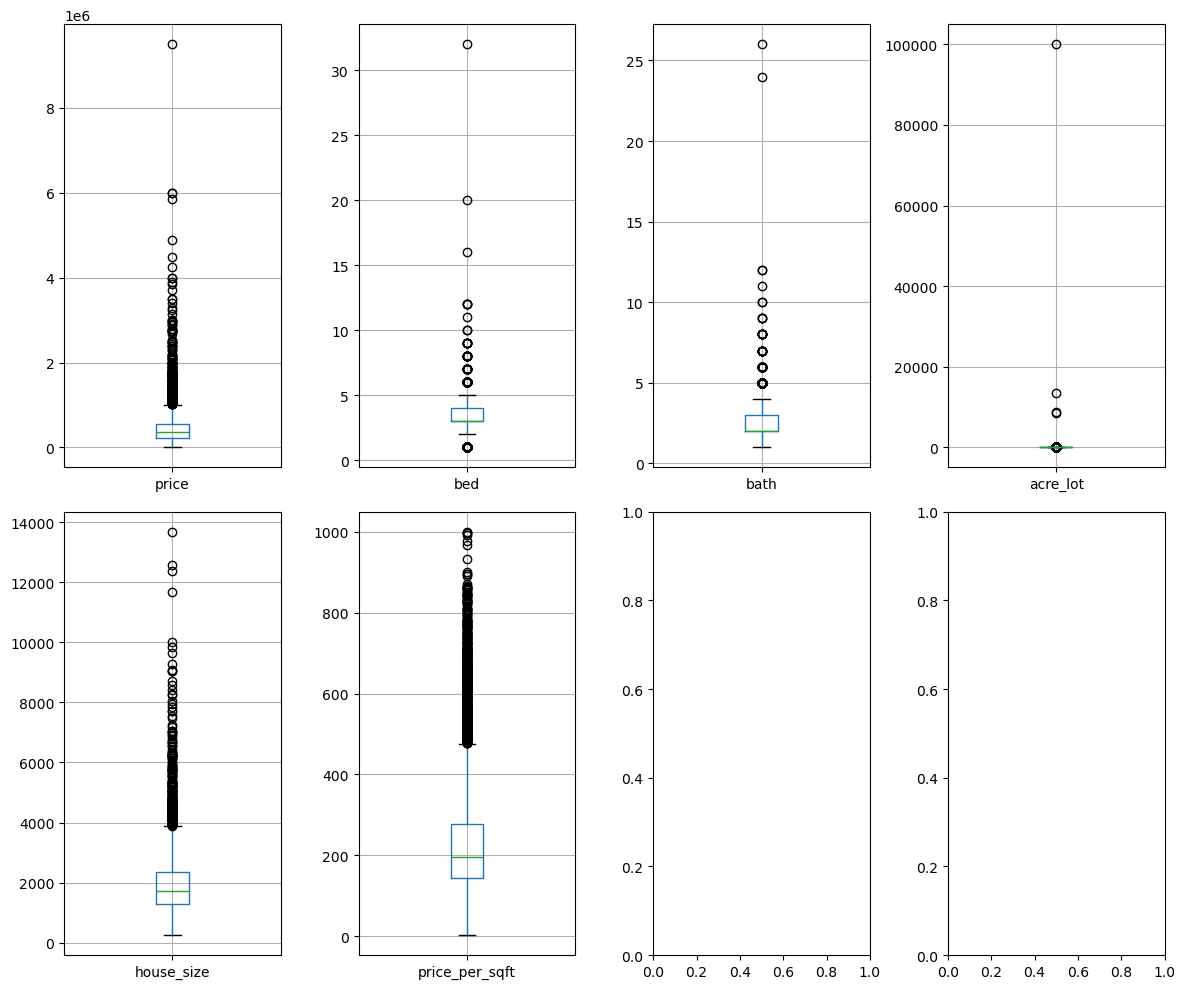

In [37]:
#create a list with the numeric columns
col_numeric = ['price','bed','bath', 'acre_lot', 'house_size','price_per_sqft']
print(col_numeric)


#check distribution of data with boxplots
#Visualization of multiple subsets of the entire data set in the same figure
#in order to compare the distribution of the subsets
#Visual Identification of outliers


fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12,10))

for i, col in enumerate(col_numeric):
    row = i // 4
    col_pos = i % 4
    df4.boxplot(column=col, ax=ax[row, col_pos])

# Adjusting the Y-axis ticks
    
plt.tight_layout()

    
plt.show();

## removing visual outliers 

In [39]:

df5 = df4

price_mask = df5.loc[:,'price'] > 2000000
df5 = df5[~price_mask ] 

bed_mask = df5.loc[:,'bed'] > 10
df5 = df5[~bed_mask] 

bath_mask = df5['bath'] > 10
df5 = df5[~bath_mask]

acres_mask = df5['acre_lot'] > 40
df5 = df5[~acres_mask]

house_mask = df5['house_size'] > 8000
df5 = df5[~house_mask]

ppsf_mask = df5['price_per_sqft'] > 800
df5 = df5[~ppsf_mask]


## check distribution of data with boxplots

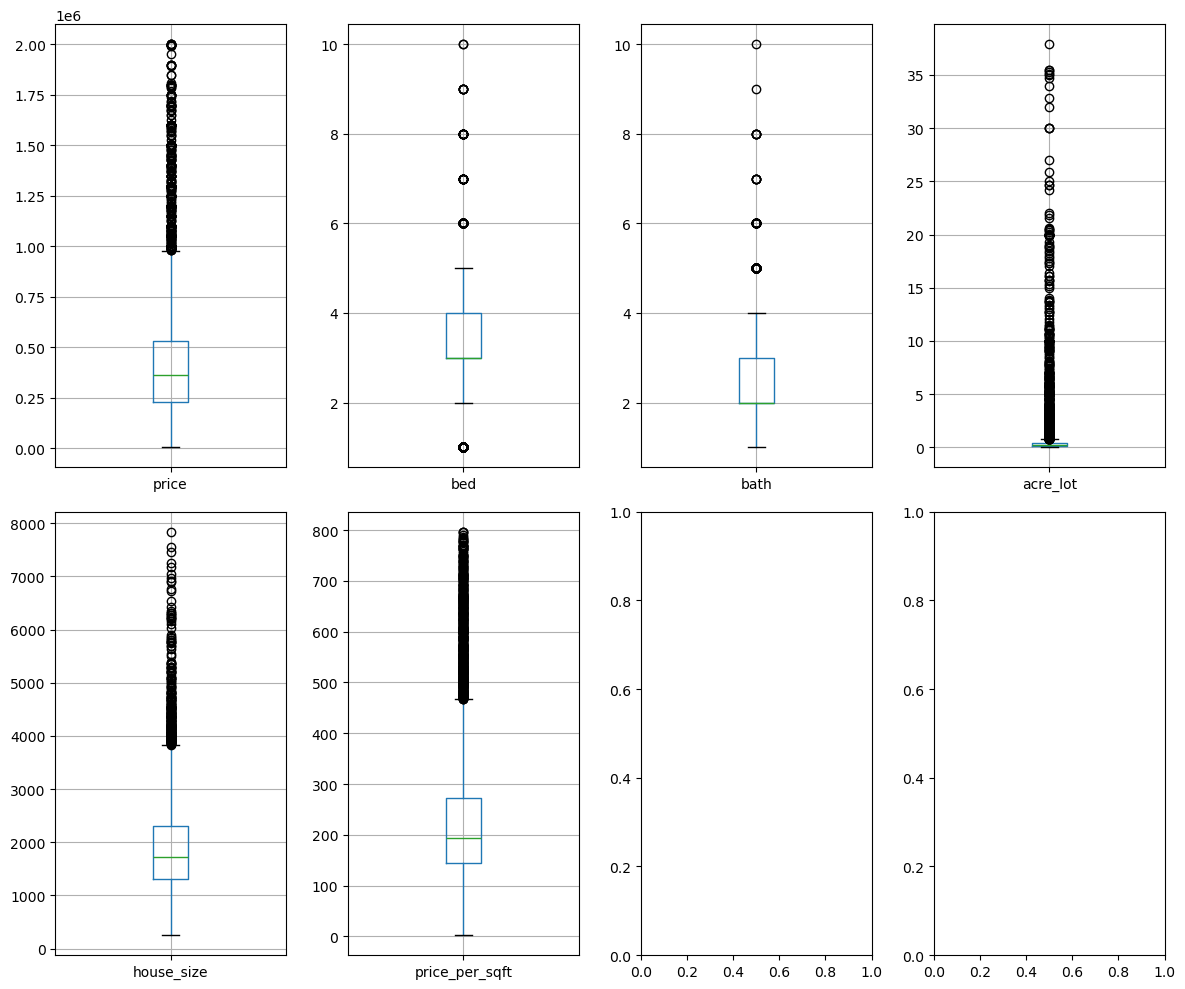

(6619, 7)

In [41]:
#Visualization of multiple subsets of the entire data set in the same figure
#in order to compare the distribution of the subsets
#Visual Identification of outliers

col_numeric = ['price','bed','bath', 'acre_lot', 'house_size','price_per_sqft']

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12,10))

for i, col in enumerate(col_numeric):
    row = i // 4
    col_pos = i % 4
    df5.boxplot(column=col, ax=ax[row, col_pos])

# Adjusting the Y-axis ticks
    
plt.tight_layout()

    
plt.show();

df5.shape

In [42]:
df5.dtypes

price             float64
bed               float64
bath              float64
acre_lot          float64
state              object
house_size        float64
price_per_sqft    float64
dtype: object

## checking distribution 


In [44]:
import seaborn as sns

num_cols = df5.select_dtypes(include=['float64']).columns.tolist()
cols = 2
rows = int(np.ceil(len(num_cols) / cols))

fig, axes = plt.subplots(rows, cols, figsize = (cols*10, rows*8))


for i, col in enumerate(num_cols):
    row = i // 2
    col_pos = i % 2
    sns.histplot(data = df5,
                x = col,
                ax=axes[row][col_pos])
    axes[row][col_pos].set_title(f'Histogramm - {col}')
    

## bath - Bed features

In [46]:
# any time you have a bathroom greater than number of betroom plus 3, will be considered a outlier

df5[df5.bath > df5.bed+2]
print(len(df5[df5.bath > df5.bed+2]))

4


In [47]:
# dropping rows where the ratio room bath does not fit

df6= df5[df5.bath <= df5.bed+2]
print(df6.shape)

(6615, 7)


In [48]:
# price per square foot we do not need it anymore

df7 = df6.drop(columns=['price_per_sqft'])

df7.head()

,price,bed,bath,acre_lot,state,house_size
0,50000.0,2.0,1.0,0.40,Alabama,1230.0
1,189900.0,3.0,2.0,0.47,Alabama,1794.0
2,219000.0,3.0,3.0,0.51,Alabama,2304.0
3,50000.0,3.0,1.0,0.16,Alabama,1682.0
4,159900.0,4.0,2.0,0.63,Alabama,2202.0


# Model Building

## OHE

In [51]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the ColumnTransformer correctly
cat_cols = df7.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df7.select_dtypes(include=['float64']).columns.tolist()

transformer_OHE = ColumnTransformer(
    transformers=[
        ("OHE", OneHotEncoder(drop="first", sparse_output=False), cat_cols)  # Updated parameter
    ],
    remainder="drop",
    n_jobs=1
)

# Apply the transformation
transformed_data = transformer_OHE.fit_transform(df7)

# Namen der neuen Spalten
col_OHE = transformer_OHE.named_transformers_["OHE"].get_feature_names_out(cat_cols)

# Remove the prefix 'state_'
new_col_names = [name.split('_', 1)[-1] for name in col_OHE]

df_OHE = pd.DataFrame(transformed_data, dtype="int", columns=new_col_names, index=df7.index)

# Zusammenfügen zu neuem DataFrame
df8 = pd.concat([df7.loc[:, num_cols], df_OHE], axis=1)

# Display the resulting DataFrame
df8.head()


,price,bed,bath,acre_lot,house_size,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,50000.0,2.0,1.0,0.40,1230.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,189900.0,3.0,2.0,0.47,1794.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,219000.0,3.0,3.0,0.51,2304.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50000.0,3.0,1.0,0.16,1682.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,159900.0,4.0,2.0,0.63,2202.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X= df8.drop('price', axis = "columns")
X.head()

,bed,bath,acre_lot,house_size,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2.0,1.0,0.40,1230.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,0.47,1794.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,3.0,0.51,2304.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,0.16,1682.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2.0,0.63,2202.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = df8.price
y.head()

0     50000.0
1    189900.0
2    219000.0
3     50000.0
4    159900.0
Name: price, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6276589857572792

In [56]:
X_train

,bed,bath,acre_lot,house_size,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3448,1.0,1.0,0.00,756.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4926,3.0,2.0,0.13,1636.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5544,3.0,2.0,0.16,1274.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4404,3.0,2.0,0.35,1288.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2190,2.0,2.0,0.00,1016.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2.0,2.0,0.00,1045.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3535,4.0,3.0,0.22,2440.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1414,2.0,2.0,9.24,972.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4749,2.0,1.0,0.17,1074.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

def find_best_model_using_gridsearchcv(X, y):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'n_jobs': [-1, 1],
                'positive': [True, False]  # Added parameter
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Corrected parameter
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_scaled, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage
# Replace X and y with your actual data
# X, y = your_data()
find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.634044,"{'fit_intercept': True, 'n_jobs': -1, 'positiv..."
1,lasso,0.634045,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.382871,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [58]:
def predict_price(bed, bath, acre_lot, state, house_size):
    loc_index = np.where(X.columns == state)[0][0]
    
    x = np.zeros(len(X.columns))
    
    x[0] = bed
    x[1] = bath
    x[2] = acre_lot
    x[3] = house_size
    
    if loc_index >=0:
        x[loc_index] = 1

    
    x_df = pd.DataFrame([x], columns=X.columns) 
    
    return lr_clf.predict(x_df)[0]

    

In [59]:
df1_all

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [119]:
predict_price(4 , 2, 0.33, 'Washington', 3600)

811313.5312414826

In [61]:
import pickle

with open('USA_Real_state_lr_model_pickle', 'wb') as f:
    
    pickle.dump(lr_clf, f)

In [121]:
import json
columns = {'data_columns' : [col.lower() for col in X.columns]}

with open ("columns.json","w") as f:
    f.write(json.dumps(columns))